In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv("C:/Users/pcc/Downloads/Company_Data (1).csv")
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

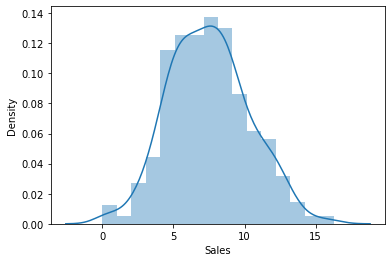

In [4]:
sns.distplot(df["Sales"])

In [5]:
sns.countplot(df["ShelveLoc"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

In [7]:
plt.scatter(df['Sales'],df["Income"])

In [8]:
sns.pairplot(df)

In [10]:
lb=LabelEncoder()
df[["ShelveLoc","Urban","US"]]=df[["ShelveLoc","Urban","US"]].apply(lb.fit_transform)
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [11]:
high_sale=[]
for i in df["Sales"]:
    if i>8:
        high_sale.append("High")
    else:
        high_sale.append("Low")
        

In [12]:
high_sale

['High',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'High',
 'Low',
 'High',
 'Low

In [13]:
df["Sales_high_low"]=pd.DataFrame(high_sale)
df

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          1   65   
2    10.06        113      35           10         269     80          2   59   
3     7.40        117     100            4         466     97          2   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          1   33   
396   6.14        139      23            3          37    120          2   55   
397   7.41        162      26           12         368    159          2   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          1   49   

     Education  Urban  US Sales_high_low  
0           17      1   1           High  
1           10      1   1           High  
2           12      1   1           High  
3           14      1   1            Low  
4           13      1   0            Low  
..         ...    ...  ..            ...  
395         14      1   1           High  
396         11      0   1            Low  
397         18      1   1            Low  
398         12      1   1            Low  
399         16      1   1           High  

[400 rows x 12 columns]

In [14]:
df.drop("Sales",axis=1,inplace=True)

In [15]:
df

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US Sales_high_low  
0           17      1   1           High  
1           10      1   1           High  
2           12      1   1           High  
3           14      1   1            Low  
4           13      1   0            Low  
..         ...    ...  ..            ...  
395         14      1   1           High  
396         11      0   1            Low  
397         18      1   1            Low  
398         12      1   1            Low  
399         16      1   1           High  

[400 rows x 11 columns]

In [16]:
df["Sales_high_low"].value_counts()

Low     236
High    164
Name: Sales_high_low, dtype: int64

<AxesSubplot:ylabel='Sales_high_low'>

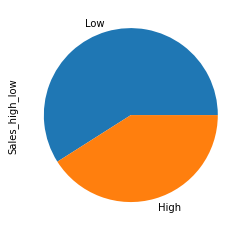

In [17]:
df["Sales_high_low"].value_counts().plot(kind='pie')

In [20]:
df["Sales_high_low"]=lb.fit_transform(df["Sales_high_low"])

In [21]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
df["Sales_high_low"].unique()

array([0, 1])

In [24]:
seed=7
kfold=KFold(n_splits=10)

In [52]:
model=DecisionTreeClassifier(max_depth=6)
result=cross_val_score(model,x,y,cv=kfold)
result

array([0.75 , 0.725, 0.775, 0.725, 0.8  , 0.725, 0.725, 0.675, 0.675,
       0.625])

In [41]:
result.mean()

0.7178571428571429

In [46]:
num_ite=100
model_1=RandomForestClassifier(n_estimators=num_ite,max_depth=6)
result_1=cross_val_score(model_1,x,y,cv=kfold)
result_1

array([0.8  , 0.825, 0.725, 0.775, 0.825, 0.85 , 0.75 , 0.75 , 0.775,
       0.85 ])

In [47]:
result_1.mean()

0.7925

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.model_selection import cross_val_predict
prediction=cross_val_predict(model_1,x_train,y_train,cv=kfold)
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [63]:
confusion_matrix(y_train,prediction)

array([[ 74,  37],
       [ 18, 151]], dtype=int64)

In [64]:
prediction_test=cross_val_predict(model_1,x_test,y=y_test,cv=kfold)

In [65]:
confusion_matrix(y_test,prediction_test)

array([[29, 24],
       [15, 52]], dtype=int64)